In [5]:
import os,sys
cwd=os.getcwd()
sys.path.append(cwd)
import numpy as np
import scipy
import scipy.stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import run_test_packing
from run_test_packing import *
seed=0
xmax,xmin=1,0
ymax,ymin=1,0
zmax,zmin=1,0
ndimensions=3
radii_dist='lognormal'
radius_mu=1.
radius_sig2=0.25
tol_self_collision=1e-2
increment_print=int(1e2)
nsamples=int(1e3 * 2) #expect: far fewer used (until we achieve target porosity within tolerance)

percentilemin,percentilemax=5,95

target_porosity=0.4


def porosity_from_radii(radii_scaled, domain_volume,ndimensions = 3):
    pvolumes = radii_scaled**3 * 4 * np.pi / 3 if ndimensions==3 else radii_scaled**2 * np.pi 
    porosity = (domain_volume - pvolumes.sum()) / domain_volume
    return porosity,pvolumes

def compute_current_domain_bounding_box(radii_scaled,pts,bbox_vertices):
    radii_scaled.max()
#     idmax = pts.argmax(axis=0)
#     idmin = pts.argmin(axis=0)

#     bbox_vertices = np.vstack(
#         (pts.min(axis=0) + radii_scaled[idmin],
#         pts.max(axis=0) + radii_scaled[idmax] ))
#     bbox_vertices = np.vstack(
#         (pts.min(axis=0) ,
#         pts.max(axis=0) ))
#     print(pts.min(axis=0), pts.max(axis=0))

#     domain_volume = np.prod( bbox_vertices[1] - bbox_vertices[0] )
#     print(domain_volume)
    domain_volume= (xmax-xmin) * (ymax-ymin) * (zmax-zmin)
    porosity,pvolumes = porosity_from_radii(radii_scaled, domain_volume)
    return bbox_vertices, domain_volume, porosity,pvolumes

def compute_correction(x,r,xn,rn):
    dxn = (xn - x[None,:]) 
    dn = np.linalg.norm( dxn , 2 , axis=1)
    
    correct = (r+ rn)
    correct = correct[:,None] - dxn * 2./ dn[:,None]
    x += correct.sum(axis=0)
    assert( np.isnan(pts).sum()+np.isinf(pts).sum() < 1)
    return x

def overlap_correction(i, x, r, pts, radii_scaled, registered, pnorm=2):
#     pts = allpts[registered]
#     radii_scaled=allradii_scaled[registered]
#     search_radius = search_radius_factor_of_max_diameter * dmax
#     print(pts.shape)
    if(pts.shape[0]<2):
        return x, 0
#     print(x[None,:] - pts)
#     dist_collide = np.linalg.norm(x[None,:]/r - pts/radii_scaled[:,None], pnorm, axis=1,keepdims=1)
    dist_collide = (x[None,:] - (pts))**2
    
    my_collision_length = radii_scaled + r
#     print("\n dist_collide ", dist_collide)
#     print("\n r ", r,
#           "\n my_collision_length ", my_collision_length)
    #print("\n my_collision_length ", my_collision_length)

    icollide = np.where(((x-pts[:])**2).sum(axis=1) < radii_scaled[:]**2 )[0]
#     print("icollide ", icollide)
    icollidesum = (icollide).sum()
        
    if( icollidesum < 1 ):
        reinit_flag = 0

    else:
        icollide = np.where(icollide)
        icollide = np.delete(icollide, np.where( dist_collide < tol_self_collision))
        x = compute_correction(x,r,pts[icollide],radii_scaled[icollide])
        reinit_flag=0

    return x, reinit_flag

1.0
Current Porosity  -0.48497218328263547


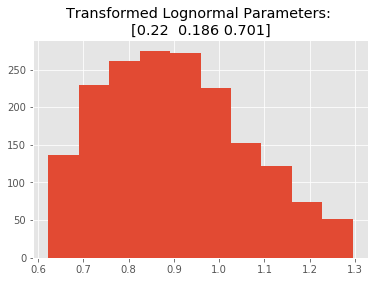

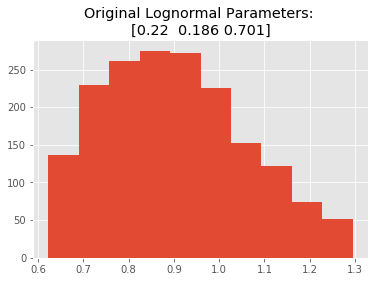

0.9779670750588048 [6.40816742 6.57465175 1.65205153]
1.1127420605665699 [ 8.30558303  1.54885151 14.23619417]
0.7191789733670777 [0.98951653 7.19511088 4.55510506]
1.1056510288860641 [ 2.47791065 12.54138705 11.43891838]
0.8647229082662432 [ 2.33516624 10.12425026 12.68088268]
0.8740616248689279 [12.37331553  1.47647356 10.9682035 ]
0.9802483042076023 [11.45638273 13.79466027  8.12870942]
0.9236432438327246 [ 7.377504   15.4418612  12.74419609]
1.2373103847408242 [ 8.93969585  5.28987314 13.52380794]
1.059978775718334 [7.28698223 1.48296307 7.27846836]
0.9190444588544203 [13.95149434  7.17251435  0.22958636]
0.9875515731415272 [ 9.78376518 15.93328005 13.07597734]
0.9635657995299702 [ 9.87580715 14.63038219 13.01730691]
1.2483495697247038 [ 7.97822964  9.45952457 11.70068495]
0.8544036667175382 [13.54281862  0.93082244 12.39686171]
0.9591452680363666 [ 7.16005504 10.57277696 12.23412818]
0.7392214567500547 [8.6320308  2.53623761 6.5524293 ]
1.0348732950009945 [ 1.2299679  11.02881106 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:89: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


0.8213428874324894 [11.54575202  0.55872154  9.07064274]
0.8507697843712384 [0.44854027 7.94303916 9.59060989]
0.8360918078750715 [10.15807529 14.8300587   4.7529123 ]
0.8226014705235398 [13.51305376  7.23553941 10.67103775]
0.680321670030551 [12.92709477 11.58465865 12.72800942]
0.9317778830202093 [10.17711212 12.81248974 14.54421563]
0.8832937180325019 [14.47070146  5.24621151 15.55156524]
0.8941507990453045 [0.92267194 9.86244309 7.92359292]
0.7672534233691175 [3.68761712 8.56236878 1.05527456]
0.871285594577274 [ 8.85942652 13.67144707  2.2555586 ]
0.9924786838819889 [ 5.20563499 10.09797234  5.74882046]
0.8235022569212275 [6.64004843 5.41521437 7.72271833]
0.8082893153664317 [5.97113526 2.30797317 3.18100474]
0.9786454140447273 [ 1.26794544  7.48251308 13.52646295]
0.7287543150869288 [ 1.44881733 10.53960796  6.72357057]
0.9462686343385591 [13.94209635  5.81301673 11.11109422]
1.0740942447538944 [ 6.38579562  8.67117506 12.39913026]
1.2115396291322362 [15.48571334  2.15819916  8.4

0.7350984813225308 [14.1795955   1.32176078 12.56217912]
0.8494717365690649 [ 7.77605543 10.11394139  9.78744401]
0.7594158195442969 [ 8.56050064 10.80124703  9.86114286]
0.8765959520823696 [ 9.22945254  2.28519253 13.83899918]
1.0530526118471881 [12.05592676 15.4299072  12.66788805]
0.8814516888543024 [ 9.32034034 14.67468082 10.46820334]
0.9666874459978249 [4.96207504 2.80805463 9.66892447]
1.0371016938949809 [11.77878616 13.18659416  4.56460703]
0.6990312394823553 [14.43200227  9.24754042 11.56948887]
0.8882740204802447 [12.93012533 14.90051175  4.63984555]
1.2721925266214964 [ 6.2794659  14.39947689 13.35161822]
0.7489503444414395 [ 6.3861799   7.47741225 11.47436202]
0.7882269868507634 [0.97999434 5.87709785 3.2996832 ]
0.8350772027707748 [ 8.30072294 12.35363882  2.07879787]
0.9497649096105598 [15.78775131  7.47378737 12.36826699]
1.005575747524494 [ 5.63866155  7.81018845 15.43782787]
1.1867790561811975 [11.04419451  0.41045152  3.71171413]
0.9998880403022209 [ 4.14817211 15.342

0.7191489646272454 [ 0.71471978  6.80653676 12.45740846]
1.0883452451101618 [ 1.28894567 10.99166632  3.6970121 ]

 Iteration 1300 
 Curr. Sph. Posn.  [ 1.28894567 10.99166632  3.6970121 ] 
 Sph. Rad. 1.0883452451101618 
 time 1542636888.168981 
 current porosity -0.06322137393676797 
 bbox_vertices [(0, 0, 0), (16, 16, 16)] 
 domain_volume 4096
1.0306803413677734 [2.03830228 4.92618967 0.30937997]
1.0095536692564808 [10.08035996  5.32654213 15.89937919]
1.04936515974061 [ 1.56542955 14.31814841  7.96732398]
1.0887211605093527 [ 1.88321151 13.69787746  1.77672902]
0.9859607664518986 [10.33374849  3.923481    7.18588071]
0.9337322585433467 [ 9.16831877 14.71480735  4.55222017]
1.0448089264499087 [6.20311754 3.19353233 5.49794617]
0.9645448544617902 [2.01298925 8.76933434 8.94770582]
1.0344490951165117 [9.97397018 3.68563807 6.91769045]
0.8947208297444236 [0.6628654  0.644107   4.95140573]
0.7537782746217476 [ 7.82628722 11.08758429 12.13877544]
0.7148518844763082 [ 6.42849568 12.0897027

1.239504728329287 [15.66935034  8.12052066  4.4607921 ]
0.8128295256021292 [ 1.77119223  5.4671234  10.14526755]
0.7757679922193523 [15.56621314  1.51040542  3.36379198]
0.869519163453141 [ 4.43109336 12.25606602  1.26357456]
0.8247536258394818 [14.31035746  3.50379195 11.48844155]
1.0642480359634665 [12.16882823 14.28933935  3.3206227 ]
0.6386216942385845 [11.57228284  5.6492156   6.21259355]
0.8407424773785577 [8.13299291 2.09877962 5.73959246]
1.1102634045148365 [15.04782962  2.89005965  5.04262323]
0.7599168559991922 [12.91645347  3.99965908  2.63664677]
0.7545091781155204 [ 3.04823185 15.77082264  6.61292176]
0.6476225865346671 [ 6.33547727 12.11228827  1.00383483]
0.7570200080938307 [ 2.71260559 11.51808163  5.11442027]
0.669157523296589 [11.22685297  0.3657655   9.4457539 ]
0.7475561873355892 [8.70793198 2.31770201 1.8997738 ]
0.7525026733942319 [14.85046717  8.08027101  0.79840847]
0.8422449710977742 [ 2.37692543 10.76084513  7.62823108]
1.0753054011945988 [ 9.56260458  7.33240

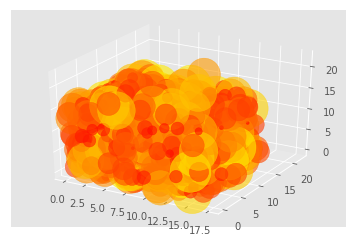

In [6]:


'''
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
'''
do_rescale=0
bbox_vertices = [(xmin,ymin,zmin),(xmax,ymax,zmax)]
domain_volume= (xmax-xmin) * (ymax-ymin) * (zmax-zmin)
coord_min,coord_max,coord_minmax=np.min((xmin,ymin,zmin)), np.max((xmax,ymax,zmax)),np.min((xmax,ymax,zmax))
RandomState = np.random.RandomState(0)
print(radius_mu)
lognormal_sig2 = np.log( radius_sig2 / radius_mu**2 + 1 )
lognormal_mu = np.log( radius_mu ) - lognormal_sig2 / 2
radii = RandomState.lognormal( lognormal_mu, lognormal_sig2 ,nsamples)
radii.mean(),np.std(radii)

'''truncate sampled distribution'''
pmin = np.percentile(radii,percentilemin),
pmax = np.percentile(radii,percentilemax)
radii = radii[radii<pmax]
radii = radii[radii>pmin]
nsamplesclip = nsamples - radii.shape[0]
nsamples = radii.shape[0]# - nsamplesclip
# radii = np.sort(radii)

Z=None
pts=None
if(do_rescale):
    '''rescale radii to obtain desired porosity'''
    rscale = ( (  np.sum(4*np.pi*(1./3.) * radii**3) ) / ( domain_volume * (1-0) ) )**(1/3)
    Z = radii/rscale
    radius_mu_scaled = radius_mu / rscale
    radius_sig2_scaled = radius_sig2 / rscale**2
    rmax = ( Z ).max()
    dmax = 2*rmax


else:
    domain_volume = np.ceil(( (radii**3 * 4 * np.pi/3.).sum() / (1.-target_porosity) ))
    domain_length = np.ceil((domain_volume)**(1./3.)).astype(int)
    sphere_length = np.ceil((domain_volume * target_porosity)**(1./3.)).astype(int)
    xmax *= sphere_length
    ymax *= sphere_length
    zmax *= sphere_length
    bbox_vertices = [(xmin,ymin,zmin),(xmax,ymax,zmax)]
    Z = radii
    bbox_vertices, domain_volume, porosity, pvolumes = compute_current_domain_bounding_box(radii, pts, bbox_vertices)
    print("Current Porosity ", porosity)
'''plot original and transformed distributions'''
plt.hist(Z);
plt.title( "Transformed Lognormal Parameters: \n" + str( np.round( scipy.stats.lognorm.fit( np.atleast_2d(Z) ), 3) ))
plt.show()

plt.hist(radii);
plt.title( "Original Lognormal Parameters: \n" + str( np.round( scipy.stats.lognorm.fit( np.atleast_2d(radii) ), 3) ))
plt.show()


# approx_samples_per_dim = int((nsamples)**(2/3))
# print(approx_samples_per_dim)
# bbox_rescale_factor = 2*Z.max() * approx_samples_per_dim
# xmax *= bbox_rescale_factor
# ymax *= bbox_rescale_factor
# zmax *= bbox_rescale_factor

''' Detect Collisions and Translate Spheres '''
registered = []
unregistered = [i for i in range(nsamples)]
boundary = []
t_list = []
tlast = time.time()
radii_scaled = np.array([])
pts=np.array([])
rands=[]
for i,radius in enumerate(Z):
    
    r = radius
    pt=np.zeros([3])
#     pt = RandomState.uniform(0,1,[ndimensions])
#     rands.append(pt)
#     pt[0] = (pt[0] ) * (xmax-xmin) + xmin
#     pt[1] = (pt[1] ) * (ymax-ymin) + ymin
#     pt[2] = (pt[2] ) * (zmax-zmin) + zmin
    pt[0] = RandomState.uniform(0,xmax)
    pt[1] = RandomState.uniform(0,ymax)
    pt[2] = RandomState.uniform(0,zmax)
    
    x = pt.copy()
    print(radius, pt)
    
    if(i==0):
#         registered.append(i)
        pts = np.array([x.tolist()])
        radii_scaled = np.array([radius])
#         print(pts.shape, radii_scaled.shape)
        
    if(i>0 and i%increment_print==0):
#         print(pts.shape, radii_scaled.shape, len(registered))

#         try:
        bbox_vertices, domain_volume, current_porosity, pvolumes = compute_current_domain_bounding_box(radii_scaled, pts, bbox_vertices)
        print("\n Iteration",i,"\n Curr. Sph. Posn. ",x, "\n Sph. Rad.",r, 
              "\n time", time.time(), "\n current porosity" , current_porosity,
              "\n bbox_vertices", bbox_vertices, "\n domain_volume" , domain_volume)
#         except Exception as e:
#             print(e)
    else:
        if(pts.shape[0]>np.inf):
            break;
        else:
            x,reinit_flag = overlap_correction(i, x, r, pts, radii_scaled,registered)
#         reinit_flag=0
        if(reinit_flag==1):
            if(periodic_geometry==1):
                break;
                
        elif(reinit_flag==0):             
            
#             print(Z[i], r)
            registered.append(i)

            pts = np.vstack((pts,x))
            radii_scaled = np.hstack((radii_scaled,r))
            Z[i] = r
            try:
                unregistered.remove(i)
            except Exception as e:
                break;
    t_list.append(time.time() - tlast)
    tlast = time.time()
    

registered=np.array(registered)
domain_volume=xmax*ymax*zmax
bbox_vertices, domain_volume, porosity, pvolumes = compute_current_domain_bounding_box(radii_scaled, pts, bbox_vertices)
save_filename = 'packing'
#save packing output
idx_points = np.arange(0,len(registered)+1)






print("\n domain size ", " [xmin,xmax] ", xmin,xmax, " [ymin,ymax] ", ymin,ymax, " [zmin,zmax] ", zmin,zmax, " volume " , domain_volume)
print('particle volumes: sum, mean, median, min, max', pvolumes.sum(), pvolumes.mean(), np.median(pvolumes) , pvolumes.min(), pvolumes.max())
print("\n \n \n porosity ", porosity)
print("\n number of spheres ", registered.shape)
print("\n number of registered spheres ", registered.shape)
print("\n number of unregistered spheres ", registered.shape )
print("\n sphere distribution parameters ", radius_mu, radius_sig2)
print("\n mean coordination number ", )
print("\n \n \n ")

stacked_data = np.vstack((idx_points.astype(int), pts[:,0], pts[:,1], pts[:,2], radii_scaled[:])).T
np.savetxt(save_filename + ".txt", stacked_data, header="ID x y z r", fmt='%i,%E,%E,%E,%E')
'''
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


psize = ((pvolumes-pvolumes.min()))
psize = psize/psize.max()
psize = psize * nsamples

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs,ys,zs=pts[:,0],pts[:,1],pts[:,2]
ax.scatter(xs, ys, zs,s=psize,c=psize,alpha=0.6)
plt.show()

In [3]:

import numpy as np

idx,x,y,z,r = np.loadtxt("packing.txt",delimiter=",",skiprows=1,unpack=True)

# Check Porosity
volume = 0.
for i in range(0,len(idx)):
	volume = volume + 4./3.*np.pi*r[i]*r[i]*r[i]
print(1.-volume)


# Check Distribution Parameters
print(np.mean(r))
print(np.std(r))

#Check Overlap
count = 0 
for i in range(0,len(idx)):
    add_to_count=0;
    for j in range(i+1,len(idx)):
        distance = np.sqrt( (x[i]-x[j])*(x[i]-x[j]) + (y[i]-y[j])*(y[i]-y[j]) + (z[i]-z[j])*(z[i]-z[j]) )
        if (distance < (r[i]+r[j])):
            add_to_count=1
    count  = count + add_to_count; 
    
print("Total Number of Overlaps ", count-1)

# Check Porosity
volume = 0.
for i in range(0,len(idx)):
	volume = volume + 4./3.*np.pi*r[i]*r[i]*r[i]
print(1.-volume)


# Check Distribution Parameters
print(np.mean(r))
print(np.std(r))


#Check Overlap
count = 0 
for i in range(0,len(idx)):
    add_to_count=0;
    for j in range(i+1,len(idx)):
        distance = np.sqrt( (x[i]-x[j])*(x[i]-x[j]) + (y[i]-y[j])*(y[i]-y[j]) + (z[i]-z[j])*(z[i]-z[j]) )
        if (distance < (r[i]+r[j])):
            add_to_count=1
    count  = count + add_to_count; 
    
print("Total Number of Overlaps ", count-1)


-6038.116645550841
0.9044601697309417
0.15699122018934394
Total Number of Overlaps  1579
-6038.116645550841
0.9044601697309417
0.15699122018934394
Total Number of Overlaps  1579


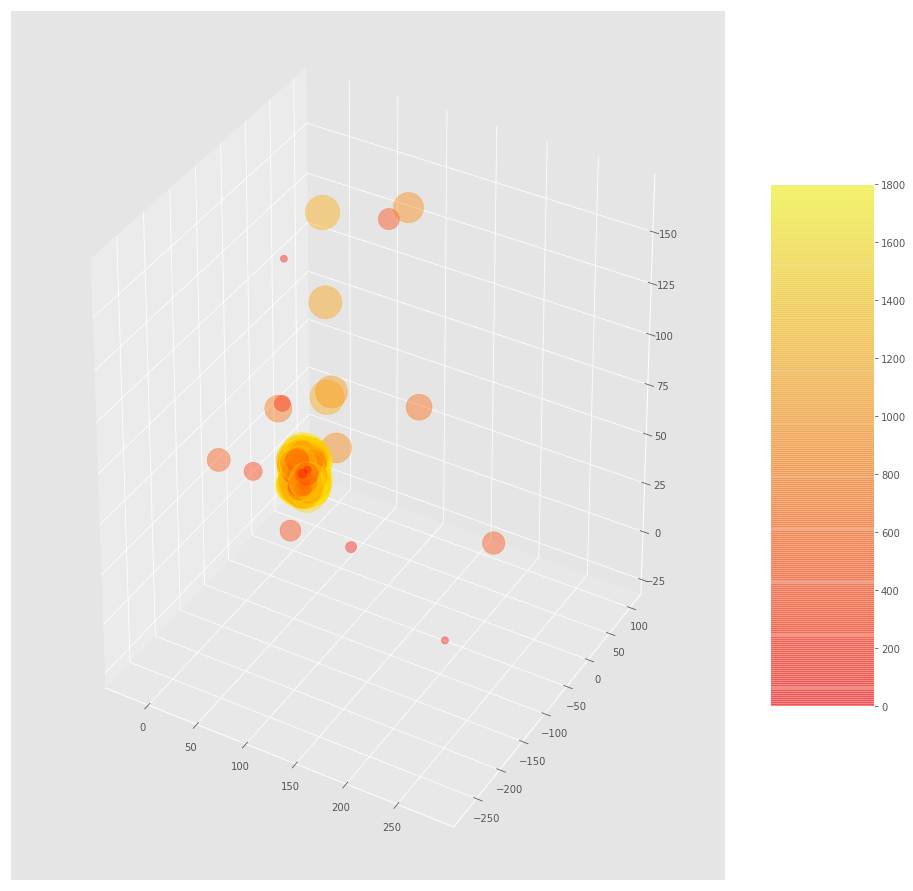

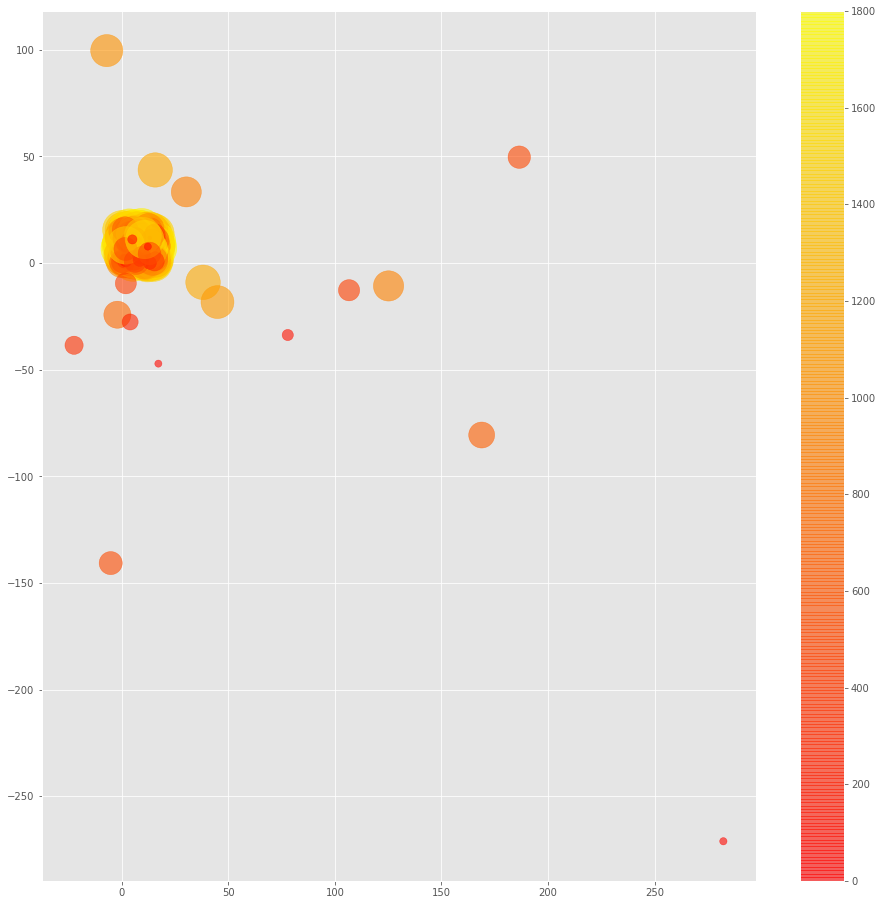

In [4]:
psize = ((pvolumes-pvolumes.min()))
psize = psize/psize.max()
psize = psize * nsamples



fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
X,Y,Z = pts[:,0],pts[:,1],pts[:,2]
cube = ax.scatter(X, Y, Z, zdir='z', s=psize, c=psize,alpha=0.4)
cbar = fig.colorbar(cube, shrink=0.6, aspect=5)
plt.savefig(save_filename+'_3d.png',dpi=200)
# plt.show()



# len(),nsamples
plt.figure(figsize=(16,16))
plt.scatter(pts[:,0],pts[:,1],s=psize,c=psize,alpha=0.6)
plt.colorbar()
plt.savefig(save_filename+'_.png',dpi=200)